In [2]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gather Data

In [3]:
# Read the twitter_archive_enhanced.csv file
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
# Programmatically download the dog image prediction files from the Udacity server using Request library
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


In [5]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [6]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

consumer_key = 'BWRLx2YFQlSNdjKoecksUTbx0'
consumer_secret = 'TMo9dtJTeMCW9siEvlRXi6r71WquqEotCMzgvFDXwF0RJyBktR'
access_token = '1031246179772911616-cfee6o1ko3NOSpojGbArraH5JzrK3O'
access_secret = 'webYHSyjxI55Qqqf9fFNvIxwQInHamU0FnfVOjcEHZTI3'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 754011816964026368


Rate limit reached. Sleeping for: 38


In [9]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [10]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweets,
                        'favorite_count': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweets_df.sample(5)

,tweet_id,retweet_count,favorite_count
638,793120401413079041,4359,13764
1733,679111216690831360,2769,6295
1349,702932127499816960,782,2750
325,832757312314028032,3968,17897
24,887101392804085760,5927,30307


## Assess Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [13]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null object
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 45.8+ KB


In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweets_df.describe()

,retweet_count,favorite_count
count,2342.000000,2342.000000
mean,2978.228010,8037.681042
std,4989.427524,12366.615439
min,0.000000,0.000000
25%,598.000000,1392.250000
50%,1392.500000,3507.500000
75%,3477.250000,9876.250000
max,84446.000000,163597.000000


In [17]:
all_columns = pd.Series(list(tweets_df) + list(df) + list(images))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [18]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
df[df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [157]:
df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Buddy        7
an           7
Toby         7
Daisy        7
Stanley      6
Scout        6
Dave         6
Milo         6
Koda         6
Rusty        6
Jax          6
Oscar        6
Leo          6
Jack         6
Bella        6
Phil         5
          ... 
Chloe        1
Anthony      1
Lorelei      1
Juckson      1
Bones        1
Harnold      1
Harry        1
Jackie       1
Zooey        1
Rooney       1
Hall         1
Gunner       1
Lupe         1
Socks        1
Dot          1
Edmund       1
Loomis       1
Banditt      1
Chaz         1
Reagan       1
Brockly      1
Shooter      1
Kendall      1
Comet        1
Todo         1
Laela        1
Danny        1
Karma        1
Creg         1
Lacy         1
Name: name, Length: 957, dtype: int64

In [21]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Quality
 
-  Eroneous datatypes in df_all_clean (like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, tweet_id, timestamp)
-  Rating numerators with decimals not showing full float
-  Rating denominator can be float
-  Names which do not look like names, eg. a, an, the.
-  Change sources to more readable categories.
-  Missing values in retweet_count and favorite_count.
-  p1, p2, p3 have underscores in some names.
-  Inconsistency in p1, p2, p3 names, some names don't start with capital letter.  

## Tidiness

-  no tweet_id column in tweets_df table
-  df, tweets_df and images are three separate tables (all tables)
-  We might want to add a gender column to know if the respective dog is a male or female.
-  doggo, floofer, pupper, puppo which describes different stages of dog are in separate columns.

## Cleaning Data

In [100]:
df_clean = df.copy()
tweets_df_clean = tweets_df.copy()
images_clean = images.copy()

#### Quality

##### `df` 
tweet_id is an int

##### `images`
tweet_id is an int

#### Define
Convert all id's from int to str.

#### Code

In [101]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Test

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [103]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


#### Tidiness

######  `All tables` 
df, tweets_df and images are three separate tables

##### Define
Merge df_clean, tweets_df_clean and images_clean into one dataframe on tweet_id and name it df_all_clean.

##### Code

In [104]:
df_all_clean = pd.merge(df_clean, tweets_df_clean,
                        how = 'inner', on = 'tweet_id')
df_all_clean = pd.merge(df_all_clean, images_clean,
                        how = 'inner', on = 'tweet_id')

#### Test

In [105]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2067

In [106]:
df_all_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
231,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,...,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
348,819588359383371776,NaN,NaN,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819588359...,...,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True
839,745314880350101504,NaN,NaN,2016-06-21 17:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745314880...,...,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False


In [107]:
df_all_clean.name.value_counts()

None       574
a           55
Oliver      10
Charlie     10
Lucy        10
Penny       10
Cooper      10
Tucker      10
Lola         8
Sadie        8
Winston      8
Bo           8
an           7
the          7
Daisy        7
Toby         7
Stanley      6
Scout        6
Bailey       6
Rusty        6
Koda         6
Milo         6
Jax          6
Bella        6
Dave         6
Larry        5
Buddy        5
Chester      5
Leo          5
Oscar        5
          ... 
Ron          1
Saydee       1
Cermet       1
Chloe        1
Anthony      1
Reagan       1
Baloo        1
Quinn        1
Edmund       1
Tobi         1
light        1
Jackie       1
Rooney       1
Hall         1
Gunner       1
Lupe         1
Socks        1
Dot          1
Loomis       1
Karma        1
Banditt      1
Zooey        1
Chaz         1
Brockly      1
Kendall      1
Comet        1
Todo         1
Laela        1
Danny        1
Lacy         1
Name: name, Length: 936, dtype: int64

#### Quality

##### `df_all_clean` 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are of type float.

#### Define
Convert them to str.

#### Code

In [108]:
df_all_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(str)
df_all_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(str)
df_all_clean.retweeted_status_id = df_clean.retweeted_status_id.astype(str)
df_all_clean.retweeted_status_user_id = df_clean.retweeted_status_user_id.astype(str)

#### Test

In [109]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 

#### Quality

##### `df_all_clean` 
timestamp and retweeted_status_timestamp are of type str.

#### Define
Convert them to datetime.

#### Code

In [110]:
df_all_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_all_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

#### Test

In [111]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count

#### Tidiness

##### `df_all_clean` 
doggo, floofer, pupper, puppo which describes different stages of dog are in separate columns.

#### Define
Create 'dog_stage' variable to combine doggo, floofer, pupper, puppo into one column. 
Drop doggo, floofer, pupper, puppo columns.

##### Code

In [112]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
df_all_clean['dog_stage'] = df_all_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [113]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_all_clean = df_all_clean.drop(columns, axis=1)

#### Test

In [114]:
df_all_clean.dog_stage.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

In [115]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1              

In [116]:
df_all_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


#### Quality

##### `df_all_clean` 
dog_stage is of type str.

#### Define
Convert dog_stage to category type.

#### Code

In [117]:
df_all_clean.dog_stage = df_all_clean.dog_stage.astype('category')

#### Test

In [118]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1              

#### Quality

##### `df_all_clean` 
Missing values in retweet_count and favorite_count.

#### Define
Fill NaNs with median values.

#### Code

In [119]:
median_retweet = np.median(df_all_clean.retweet_count.dropna())
median_favorite = np.median(df_all_clean.favorite_count.dropna())
print(median_retweet, median_favorite)

1343.0 3750.0


In [120]:
df_all_clean.retweet_count = df_all_clean.retweet_count.fillna(median_retweet).astype('int64')
df_all_clean.favorite_count = df_all_clean.favorite_count.fillna(median_favorite).astype('int64')

#### Test

In [121]:
df_all_clean.retweet_count.head()

0    8468
1    6235
2    4133
3    8589
4    9326
Name: retweet_count, dtype: int64

In [122]:
df_all_clean.favorite_count.head()

0    38469
1    32957
2    24825
3    41833
4    40001
Name: favorite_count, dtype: int64

In [123]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1              

#### Quality

##### `df_all_clean` 
p1, p2, p3 have underscores in some names.

#### Define
Replace the underscore with a blank space in p1, p2, p3 columns.

#### Code

In [124]:
df_all_clean['p1'] = df_all_clean['p1'].str.replace('_', ' ')
df_all_clean['p2'] = df_all_clean['p2'].str.replace('_', ' ')
df_all_clean['p3'] = df_all_clean['p3'].str.replace('_', ' ')

#### Test

In [125]:
df_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,NaN


#### Quality

##### `df_all_clean` 
Inconsistency in p1, p2, p3 names, some names don't start with capital letter.

#### Define
make p1, p2, p3 names consistent with all names starting with a capital letter.

#### Code

In [126]:
df_all_clean['p1'] = df_all_clean['p1'].str.title()
df_all_clean['p2'] = df_all_clean['p2'].str.title()
df_all_clean['p3'] = df_all_clean['p3'].str.title()

#### Test

In [127]:
df_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,NaN


#### Tidiness

##### `df_all_clean` 
There is no gender column in the dataframe.

#### Define
Create a column 'dog_gender', create two lists describing male and female and look through text to find out gender of the dog.

#### Code

In [128]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_all_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')


#### Test

In [129]:
len(dog_gender)

2067

In [130]:
# Save the result in a new column 'dog_name'
df_all_clean['dog_gender'] = dog_gender

In [131]:
print("dog_gender count \n", df_all_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1176
male       651
female     240
Name: dog_gender, dtype: int64


In [132]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1              

#### Quality

##### `df_all_clean` 
some ratings are float while are represented as int and some not properly extracted 

#### Define
Replace the rating_numerator and rating_denominator by new values and convert them float

#### Code

In [133]:
df_all_clean[df_all_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]['text'].values

c:\users\sruth\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
      dtype=object)

In [134]:
num_den = df_all_clean['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)
num_den.columns = ['col1','col2','col3','col4']
num_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 4 columns):
col1    2067 non-null object
col2    4 non-null object
col3    2063 non-null object
col4    2067 non-null object
dtypes: object(4)
memory usage: 48.4+ KB


In [135]:
num_den.col1.unique()

array(['13', '12', '14', '13.5', '11', '10', '6', '15', '0', '84', '24',
       '9.75', '5', '11.27', '3', '7', '8', '9', '4', '165', '1776',
       '204', '50', '99', '80', '45', '60', '44', '143', '121', '11.26',
       '2', '144', '88', '1', '420'], dtype=object)

In [136]:
df_all_clean.iloc[num_den[num_den.col1=='0'].index.values]['text'].values

array(["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"],
      dtype=object)

In [137]:
df_all_clean.iloc[num_den[num_den.col1=='1776'].index.values]['text'].values

array(["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"],
      dtype=object)

In [138]:
num_den.col4.unique()

array(['10', '70', '7', '150', '11', '170', '20', '50', '90', '80', '40',
       '130', '110', '120', '2'], dtype=object)

In [139]:
df_all_clean.iloc[num_den[num_den.col4 == '170'].index.values]['text'].values

array(['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'],
      dtype=object)

Replace the rating_numerator and rating_denominator by new values and convert them float

In [140]:
df_all_clean['rating_numerator']=num_den.col1.astype(float)
df_all_clean['rating_denominator']=num_den.col4.astype(float)

#### Test

In [141]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null float64
rating_denominator            2067 non-null float64
name                          2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1          

In [142]:
df_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_gender
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,female
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,male
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,NaN,female
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,NaN,male


#### Quality

##### `df_all_clean` 
names which do not look like names, eg. a, an, the etc. 

#### Define
clean up name column that are not true names and replace by "None" and capitalize names

#### Code

In [143]:
df_all_clean.name.value_counts()

None       574
a           55
Oliver      10
Charlie     10
Lucy        10
Penny       10
Cooper      10
Tucker      10
Lola         8
Sadie        8
Winston      8
Bo           8
an           7
the          7
Daisy        7
Toby         7
Stanley      6
Scout        6
Bailey       6
Rusty        6
Koda         6
Milo         6
Jax          6
Bella        6
Dave         6
Larry        5
Buddy        5
Chester      5
Leo          5
Oscar        5
          ... 
Ron          1
Saydee       1
Cermet       1
Chloe        1
Anthony      1
Reagan       1
Baloo        1
Quinn        1
Edmund       1
Tobi         1
light        1
Jackie       1
Rooney       1
Hall         1
Gunner       1
Lupe         1
Socks        1
Dot          1
Loomis       1
Karma        1
Banditt      1
Zooey        1
Chaz         1
Brockly      1
Kendall      1
Comet        1
Todo         1
Laela        1
Danny        1
Lacy         1
Name: name, Length: 936, dtype: int64

In [144]:
name = {"a": "None", 'the': "None", 'an':'None'}
df_all_clean['name'].replace(name, inplace=True)
df_all_clean['name'] = df_all_clean['name'].str.title()

#### Test

In [145]:
df_all_clean.name.value_counts()

None       643
Lucy        10
Penny       10
Cooper      10
Charlie     10
Tucker      10
Oliver      10
Lola         8
Bo           8
Winston      8
Sadie        8
Daisy        7
Toby         7
Rusty        6
Bella        6
Jax          6
Koda         6
Dave         6
Scout        6
Bailey       6
Stanley      6
Milo         6
Larry        5
Leo          5
Buddy        5
Chester      5
Alfie        5
Louis        5
Oscar        5
Dexter       4
          ... 
Chloe        1
Anthony      1
Lorelei      1
Juckson      1
Dawn         1
Harnold      1
Harry        1
Tobi         1
Banditt      1
Jackie       1
Rooney       1
Hall         1
Gunner       1
Lupe         1
Socks        1
Dot          1
Edmund       1
Loomis       1
Zooey        1
Reagan       1
Chaz         1
Brockly      1
Kendall      1
Comet        1
Todo         1
Laela        1
Karma        1
Baloo        1
Creg         1
Lacy         1
Name: name, Length: 933, dtype: int64

#### Quality

##### `df_all_clean` 
Change sources to more readable categories.
#### Define
source has 3 types, we will clean that column and made them clear.

#### Code

In [146]:
df_all_clean.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [147]:
# Clean the content of source column
df_all_clean['source'] = df_all_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [148]:
df_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_gender
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,female
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,male
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,NaN,female
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,NaN,male


## Store Data

Store the clean DataFrame df_all_clean in a CSV file named twitter_archive_master.csv

In [149]:
df_all_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyse

Let's Analyse to see if there is a correlation between favorite_count and retweet_Count.

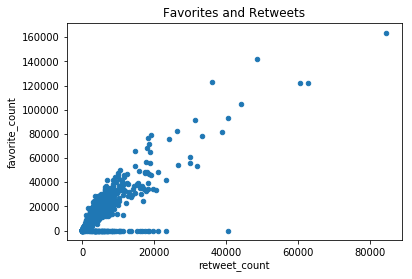

In [150]:
df_all_clean.plot.scatter('retweet_count', 'favorite_count')
plt.title("Favorites and Retweets")
plt.savefig('scatterfavrwt.png');

In [151]:
df_all_clean.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.198448,0.017083,0.015930,-0.000022,-0.008738,-0.029139,-0.020093,-0.032603,-0.004504,-0.029151
rating_denominator,0.198448,1.000000,-0.021629,-0.025431,-0.004082,-0.004463,0.000869,-0.034427,-0.000558,0.006873,0.004980
retweet_count,0.017083,-0.021629,1.000000,0.854392,0.105023,0.048638,0.006733,-0.007979,0.017970,-0.035227,0.000481
favorite_count,0.015930,-0.025431,0.854392,1.000000,0.126992,0.069242,0.047513,-0.018460,0.053831,-0.049182,0.039037
img_num,-0.000022,-0.004082,0.105023,0.126992,1.000000,0.203550,0.027013,-0.160248,0.047050,-0.139085,0.059035
p1_conf,-0.008738,-0.004463,0.048638,0.069242,0.203550,1.000000,0.115940,-0.512399,0.130841,-0.709677,0.107115
p1_dog,-0.029139,0.000869,0.006733,0.047513,0.027013,0.115940,1.000000,0.112707,0.634410,0.050398,0.555311
p2_conf,-0.020093,-0.034427,-0.007979,-0.018460,-0.160248,-0.512399,0.112707,1.000000,0.101338,0.479663,0.066929
p2_dog,-0.032603,-0.000558,0.017970,0.053831,0.047050,0.130841,0.634410,0.101338,1.000000,0.044087,0.551136
p3_conf,-0.004504,0.006873,-0.035227,-0.049182,-0.139085,-0.709677,0.050398,0.479663,0.044087,1.000000,0.043541


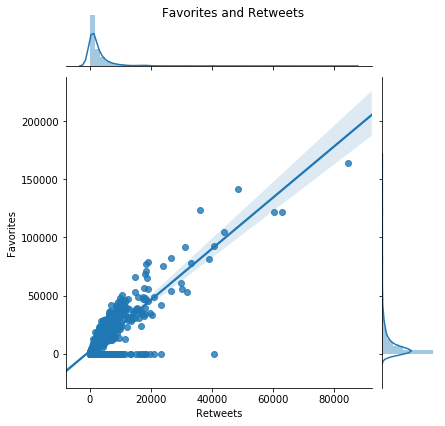

In [152]:
g = sns.jointplot(x="retweet_count", y="favorite_count", data=df_all_clean, kind="reg")
g.fig.suptitle('Favorites and Retweets')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.savefig('scatterjoin.png');

There is a strong positive correlation between favorite_count and retweet_count. Correlation value is about 0.85. When favorite tweets increases, number of retweets also increases and vice-versa. It looks like they have a non-linear relationship.

Let's analyse how favorite_count and retweet_count vary with different dog_stages and dog_gender. 

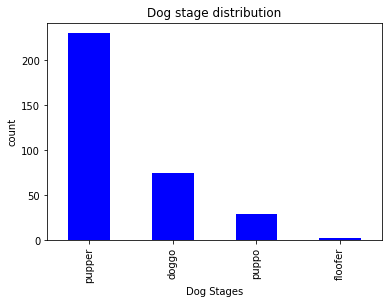

In [153]:
df_all_clean.dog_stage.value_counts().plot(kind = 'bar', color = 'blue')
plt.title('Dog stage distribution')
plt.xlabel('Dog Stages')
plt.ylabel('count')
plt.savefig('stagebar.png');

In the above visualisation, most dogs are in pupper stage as compared to rest of the stages.

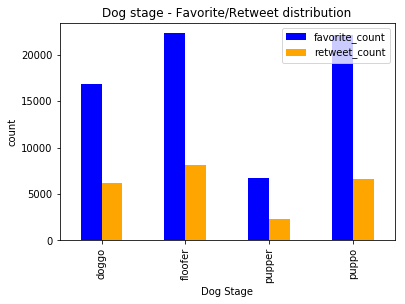

In [154]:
#df_all_clean.plot(kind = 'bar', dog_stages, favorite_count)
df_all_clean.groupby('dog_stage')['favorite_count', 'retweet_count'].mean().plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Dog stage - Favorite/Retweet distribution')
plt.xlabel('Dog Stage')
plt.ylabel('count')
plt.savefig('stage_favrwt.png');

Pupper gets the least favorite and retweet counts in spite of it having the highest frequency as compared to others. Floofer gets the highest favorites and retweets.

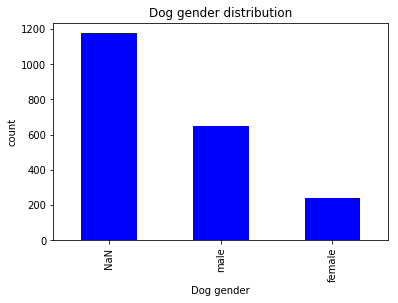

In [155]:
df_all_clean.dog_gender.value_counts().plot(kind = 'bar', color = 'blue')
plt.title('Dog gender distribution')
plt.xlabel('Dog gender')
plt.ylabel('count')
plt.savefig('genderbar.png');

There are more male dogs than female dogs.

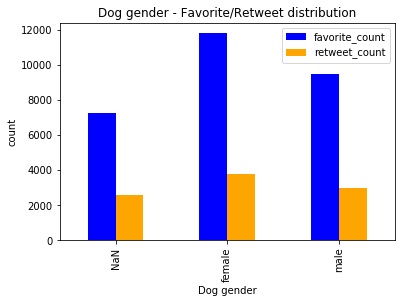

In [156]:
df_all_clean.groupby('dog_gender')['favorite_count', 'retweet_count'].mean().plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Dog gender - Favorite/Retweet distribution')
plt.xlabel('Dog gender')
plt.ylabel('count')
plt.savefig('gender_favrwt.png');

Female dogs gets most favorite and retweet counts as compared to male dogs inspite of male dogs having a higher frequency.